Name: Adam Shaar

Submission:

1- Run all cells (this is important, the results will remain there for us to look)

2- Download .ipynb

3- Download .py

4- Use Save as or Print to create a PDF version of the notebook  

5- Create a directory named: firstname_lastname_lr (e.g. pedram_rooshenas_lr)

6- Put all three .ipynb, .py, and .pdf into the directory. (*** Don't forget the PDF and .py ***) 

7- Zip (don't use rar) and Submit on Gradescope

In [2]:
#Mounting Google Drive:
#After running this cell a popup window will appear and requesting to select your  Google account and give the access permission.
#You can either use your personal Google account or your UIC Google account.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path="/content/gdrive/MyDrive/mlcourse/hw2/"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import re
import pandas as pd

Numpy is library for scientific computing in Python. It has efficient implementation of n-dimensional array (tensor) manupulations, which is useful for machine learning applications.

In [5]:
import numpy as np

We can convert a list into numpy array (tensor)  

In [6]:
b = [[1, 2, 4], [2, 6, 9]]
a = np.array(b)
a

array([[1, 2, 4],
       [2, 6, 9]])

We can check the dimensions of the array

In [7]:
a.shape

(2, 3)

We can apply simple arithmetic operation on all element of a tensor

In [8]:
a * 3

array([[ 3,  6, 12],
       [ 6, 18, 27]])

You can transpose a tensor
    

In [9]:
print(a.T.shape)
a.T

(3, 2)


array([[1, 2],
       [2, 6],
       [4, 9]])

You can apply aggregate functions on the whole tensor

In [10]:
np.sum(a)

24

or on one dimension of it

In [11]:
np.sum(a, axis=0)

array([ 3,  8, 13])

In [12]:
np.sum(a, axis=1)

array([ 7, 17])

We can do element-wise arithmetic operation on two tensors (of the same size)

In [13]:
c1 = np.array([[1, 2, 4], [2, 6, 9]])
c2 = np.array([[2, 3, 5], [1, 2, 1]])
c1 * c2

array([[ 2,  6, 20],
       [ 2, 12,  9]])

If you want to multiply all columns of a tensor by vector (for example if you want to multiply all data features by their lables) you need a trick. This multiplication shows up in calculating the gradients. 

In [14]:
a = np.array([[1, 2, 4], [2, 6, 9]])
b = np.array([1,-1])
print(a)
print(b)


[[1 2 4]
 [2 6 9]]
[ 1 -1]


Here we want to multiply the first row of a by 1 and the second row of a by -1. Simply multiplying a by b does not work because a and b do not have the same dimension

In [ ]:
a * b

ValueError: ignored

To do this multiplication we first have to assume b has one column and then repeat the column of b with the number of columns in a. We use tile function to do that

In [15]:
b_repeat = np.tile(b,  (a.shape[1],1)).T
print(b_repeat.shape)
b_repeat

(2, 3)


array([[ 1,  1,  1],
       [-1, -1, -1]])

Now we can multiply each column of a by b:

In [16]:
a * b_repeat

array([[ 1,  2,  4],
       [-2, -6, -9]])

You can create inital random vector using numpy (using N(0,1)):

In [17]:
mu = 0 #mean
sigma = 1 #standard deviation
r = np.random.normal(mu,sigma, 1000) #draws 1000 samples from a normal distribution

We can apply functions on tensors

In [18]:
#implementation of Normal distribution
def normal(x, mu, sigma):
    return np.exp( -0.5 * ((x-mu)/sigma)**2)/np.sqrt(2.0*np.pi*sigma**2)

#probability of samples on the Normal distribution
probabilities = normal(r, mu, sigma)

Numpy has useful APIs for analysis. Here we plot the histogram of samples and also plot the probabilies to see if the samples follow the normal distribution.

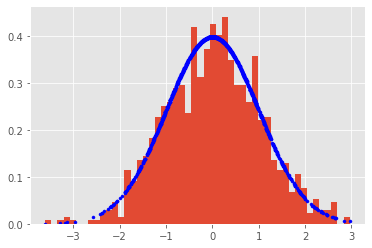

In [19]:
counts, bins = np.histogram(r,50,density=True)
plt.hist(bins[:-1], bins, weights=counts)
plt.scatter(r, probabilities, c='b', marker='.')

In [20]:
def read_data(filename):
    f = open(filename, 'r')
    p = re.compile(',')
    xdata = []
    ydata = []
    header = f.readline().strip()
    varnames = p.split(header)
    namehash = {}
    for l in f:
        li = p.split(l.strip())
        xdata.append([float(x) for x in li[:-1]])
        ydata.append(float(li[-1]))
    
    return np.array(xdata), np.array(ydata)


Assuming our data is x is available in numpy we use numpy to implement logistic regression


In [21]:
(xtrain_whole, ytrain_whole) = read_data(path + 'spambase-train.csv')
(xtest, ytest) = read_data(path + 'spambase-test.csv')

In [22]:
print("The shape of xtrain:", xtrain_whole.shape)
print("The shape of ytrain:", ytrain_whole.shape)
print("The shape of xtest:", xtest.shape)
print("The shape of ytest:", ytest.shape)

The shape of xtrain: (3601, 54)
The shape of ytrain: (3601,)
The shape of xtest: (1000, 54)
The shape of ytest: (1000,)


before training make we normalize the input data (features)

In [23]:
xmean = np.mean(xtrain_whole, axis=0)
xstd = np.std(xtrain_whole, axis=0)
xtrain_normal_whole = (xtrain_whole-xmean) / xstd
xtest_normal = (xtest-xmean) / xstd

We need to create a validation set. We create an array of indecies and permute it.

In [52]:
premute_indicies = np.random.permutation(np.arange(xtrain_whole.shape[0]))

We keep the first 2600 data points as the training data and rest as the validation data 

In [25]:
xtrain_normal = xtrain_normal_whole[premute_indicies[:2600]]
ytrain = ytrain_whole[premute_indicies[:2600]]
xval_normal = xtrain_normal_whole[premute_indicies[2600:]]
yval = ytrain_whole[premute_indicies[2600:]]

Initiallizing the weights and bias with random values from N(0,1)

In [26]:
weights = np.random.normal(0, 1, xtrain_normal.shape[1]);
bias = np.random.normal(0,1,1)

In [27]:
#the sigmoid function
def sigmoid(v):
    #return np.exp(-np.logaddexp(0, -v)) #numerically stable implementation of sigmoid function 
    return 1.0 / (1+np.exp(-v))

We can use dot-product from numpy to calculate the margin and pass it to the sigmoid function

In [28]:
#w: weight vector (numpy array of size n)
#b: numpy array of size 1
#returns p(y=1|x, w, b)
def prob(x, w, b):
    return sigmoid(np.dot(x,w) + b);

You can also calculate $l_2$ penalty using linalg library of numpy 

In [29]:
np.linalg.norm(weights)

7.22076369886441

$$\text{Cross Entropy Loss} = -\frac{1}{|D|}[\sum_{(y^i,\mathbf{x}^i)\in\mathcal{D}} 
 y^i \log p(y=1|\mathbf{x}^i;\mathbf{w},b)  +  (1-y^i) \log (1 - p(y=1|\mathbf{x}^i;\mathbf{w},b))]+\frac{\lambda}{2} \|\mathbf{w}\|^2 $$

In [81]:
#w: weight vector (numpy array of size n)
#x: training data points (only attributes)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns the cross entropy loss
def loss(w, x, y_prob, y_true, lambda_):
    return ((-1 / len(x)) * np.sum(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))) + (lambda_ / 2) * np.sum(np.square(w))
    

In [82]:
#x: input variables (data of size m x n with m data point and n features)
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns tuple of gradient w.r.t w and w.r.t to bias

def grad_w_b(x, w, y_prob, y_true, lambda_):
    grad_w = ((1/ x.shape[1]) * np.dot(x.T, y_prob - y_true)) + lambda_ * w
    grad_b = (1 / len(y_true)) * np.sum(y_prob - y_true)
    return (grad_w,grad_b)

In [83]:

#lambda_ is the coeffienct of l2 norm penalty
#learning_rate is learning rate of gradient descent algorithm
#max_iter determines the maximum number of iterations if the gradients descent does not converge.
#continue the training while gradient > 0.1 or the number steps is less max_iter

#returns model as tuple of (weights,bias)

def fit(x, y_true, learning_rate, lambda_, max_iter, verbose=0):
    weights = np.random.normal(0, 1, x.shape[1]);
    bias = np.random.normal(0,1,1)
    iter = 0
    grad_w_norm = 1
    #change the condition appropriately
    while iter < max_iter and grad_w_norm > 0.1:
        y_prob = prob(x, weights, bias)
        grad_w, grad_b = grad_w_b(x, weights, y_prob, y_true, lambda_)
        weights -= learning_rate * grad_w
        bias -= learning_rate * grad_b
        weights_norm = np.linalg.norm(weights)
        grad_w_norm = np.linalg.norm(grad_w)
        if verbose: #verbose is used for debugging purposes
            loss_ = loss(weights, x, y_prob, y_true, lambda_)
            print(f"Iteration Number: {iter}, Loss: {loss_:5f}, 12 norm of gradients: {grad_w_norm:5f}, 12 norm of weights: {weights_norm:5f}")
            #print iteration number, loss, l2 norm of gradients, l2 norm of weights
        iter += 1
    return (weights, bias)

In [84]:
def accuracy(x, y_true, model):
    w, b = model
    return np.sum((prob(x, w, b)>0.5).astype(np.float64) == y_true)  / y_true.shape[0]

In [85]:
learning_rate = 0.001
lambda_ = 1.0

model = fit(xtrain_normal, ytrain, learning_rate, lambda_, 10000, verbose=1) #keep the verbose on here for your submissions

Iteration Number: 0, Loss: 27.412035, 12 norm of gradients: 57.510002, 12 norm of weights: 7.080815
Iteration Number: 1, Loss: 27.201479, 12 norm of gradients: 56.078503, 12 norm of weights: 7.060199
Iteration Number: 2, Loss: 26.997491, 12 norm of gradients: 54.638096, 12 norm of weights: 7.039988
Iteration Number: 3, Loss: 26.799813, 12 norm of gradients: 53.213519, 12 norm of weights: 7.020160
Iteration Number: 4, Loss: 26.608141, 12 norm of gradients: 51.827970, 12 norm of weights: 7.000692
Iteration Number: 5, Loss: 26.422140, 12 norm of gradients: 50.498909, 12 norm of weights: 6.981566
Iteration Number: 6, Loss: 26.241466, 12 norm of gradients: 49.236412, 12 norm of weights: 6.962762
Iteration Number: 7, Loss: 26.065780, 12 norm of gradients: 48.043316, 12 norm of weights: 6.944264
Iteration Number: 8, Loss: 25.894766, 12 norm of gradients: 46.916753, 12 norm of weights: 6.926058
Iteration Number: 9, Loss: 25.728136, 12 norm of gradients: 45.850506, 12 norm of weights: 6.908130


In [86]:
print("Train accuracy: ", accuracy(xtrain_normal, ytrain, model))

Train accuracy:  0.9192307692307692


In [87]:
#grid search for finding the best hyperparams and model

best_model = None
best_val = -1
for lr in [0.01, 0.001, 0.0001, 0.00001]:
    for la in [5, 2, 1, 0.1, 0.01]:
        model = fit(xtrain_normal, ytrain, lr, la, 10000, verbose=0)
        val_acc = accuracy(xval_normal, yval, model)
        print(lr, la, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_model = model
    

0.01 5 0.8621378621378621
0.01 2 0.9110889110889111
0.01 1 0.929070929070929
0.01 0.1 0.9240759240759241
0.01 0.01 0.9280719280719281
0.001 5 0.9090909090909091
0.001 2 0.919080919080919
0.001 1 0.9140859140859141
0.001 0.1 0.9330669330669331
0.001 0.01 0.9240759240759241
0.0001 5 0.9110889110889111
0.0001 2 0.913086913086913
0.0001 1 0.9240759240759241
0.0001 0.1 0.919080919080919
0.0001 0.01 0.9070929070929071
1e-05 5 0.8161838161838162
1e-05 2 0.7452547452547452
1e-05 1 0.7442557442557443
1e-05 0.1 0.7902097902097902
1e-05 0.01 0.7572427572427572


In [88]:
print("Test accuracy: ", accuracy(xtest_normal, ytest, best_model))

Test accuracy:  0.941
